# Tensorflow


In [4]:
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)


Using TensorFlow version 2.2.0


# The Dataset


In [5]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


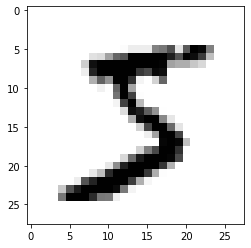

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

In [8]:
y_train[0]

5

In [9]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# One Hot Encoding



| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |


In [10]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [11]:
print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)

y_train shape:  (60000, 10)
y_test shape:  (10000, 10)


In [12]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Preprocessing the Examples


In [13]:
import numpy as np

x_train_reshaped = np.reshape(x_train,(60000,784))
x_test_reshaped = np.reshape(x_test, (10000,784))

print('x_train_reshape shape:',x_train_reshaped.shape)
print('x_test_reshape shape:',x_test_reshaped.shape)


x_train_reshape shape: (60000, 784)
x_test_reshape shape: (10000, 784)


In [14]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [15]:
x_mean = np.mean(x_train_reshaped) #mean value
x_std = np.std(x_train_reshaped)   #standard deviation 

print('mean: ', x_mean)
print('std: ', x_std)

mean:  33.318421449829934
std:  78.56748998339798


In [16]:
epsilon = 1e-10  #normalization 
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

In [17]:
print(set(x_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Creating a Model



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),             #hidden layer
    Dense(128, activation = 'relu'),                                   #hidden layer
    Dense(10, activation = 'softmax')                                  #output layer
])

In [19]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Training the Model


In [20]:
h = model.fit(x_train_norm, y_train_encoded , epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8939
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1815 - accuracy: 0.9476
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1383 - accuracy: 0.9604


In [21]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1353 - accuracy: 0.9615
test set accuracy:  96.14999890327454


#  Predictions

In [22]:
prediction = model.predict(x_test_norm)
print('Shape of preds:',prediction.shape)

Shape of preds: (10000, 10)


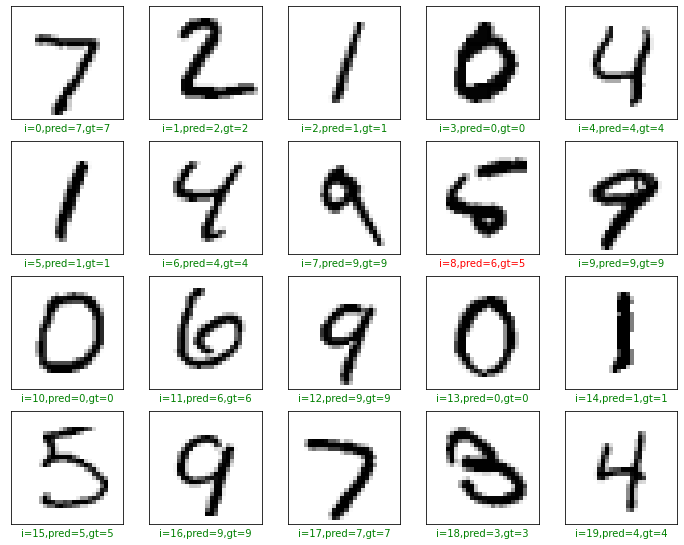

In [23]:
plt.figure(figsize=(12,12))

start_index=0

for i in range (20):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(prediction[start_index+i])
    gt=y_test[start_index+i]
    
    col= 'g'
    if pred!=gt:            #optional
        col='r'
    
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    
    plt.imshow(x_test[start_index+i],cmap='binary')

plt.show()

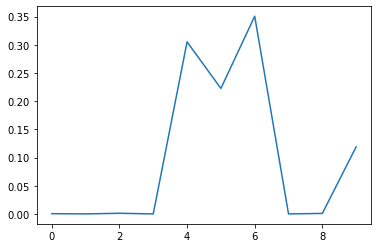

In [25]:

#Enter the index value that you want to see the prediction plot graph

index = 8

plt.plot(prediction[index])
plt.show()